In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
from dataset import DatasetGenerator, DatasetFromFile
import matplotlib.pyplot as pylab
import pprint
import numpy as np

/home/jwfree/anaconda3/envs/generators/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jwfree/anaconda3/envs/generators/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jwfree/anaconda3/envs/generators/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jwfree/anaconda3/envs/genera

In [5]:
for data_class in DatasetGenerator.data_class_list:
    dataset_generator = DatasetGenerator(data_class=data_class)
    dataset_generator.generate()

Generating dataset of class:  position_non_aligned_scale
Finished Generating:  train
Finished Generating:  val
Generation Loop Itteration:  1000
Finished Generating:  test
Evaluation time  0:00:02.495523
Generating dataset of class:  position_common_scale
Finished Generating:  train
Finished Generating:  val
Generation Loop Itteration:  1000
Finished Generating:  test
Evaluation time  0:00:02.460516
Generating dataset of class:  angle
Generation Loop Itteration:  1000
Finished Generating:  train
Finished Generating:  val
Finished Generating:  test
Evaluation time  0:00:02.545385
Generating dataset of class:  length
Finished Generating:  train
Finished Generating:  val
Finished Generating:  test
Evaluation time  0:00:00.422267
Generating dataset of class:  direction
Generation Loop Itteration:  1000
Labels Rejected by Uneven Label Distribution:  1000
Generation Loop Itteration:  2000
Labels Rejected by Uneven Label Distribution:  2000
Generation Loop Itteration:  3000
Labels Rejected by

In [6]:
raw_dataset = np.load('output/angle/train_0.npz')

for component in raw_dataset.keys():
    print(component + ":\n", raw_dataset[component].dtype, " ", raw_dataset[component].shape, "\n")


label:
 uint16   (500, 4) 

image:
 float32   (500, 100, 150) 

mask:
 bool   (500, 100, 150, 4) 

bbox:
 uint16   (500, 4, 4) 

sparse:
 uint16   (500, 4, 4) 

metadata:
 <U19   (6, 2) 



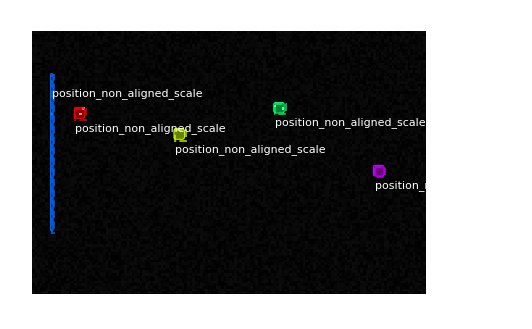

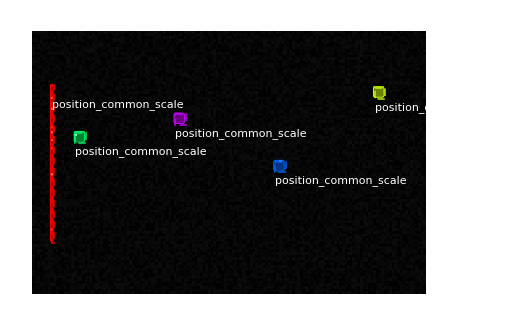

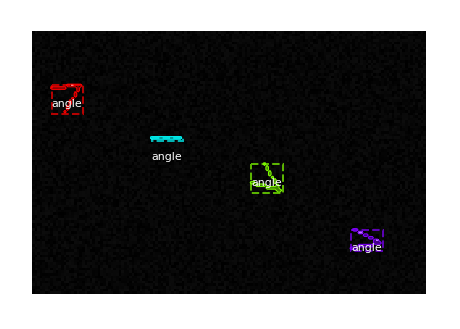

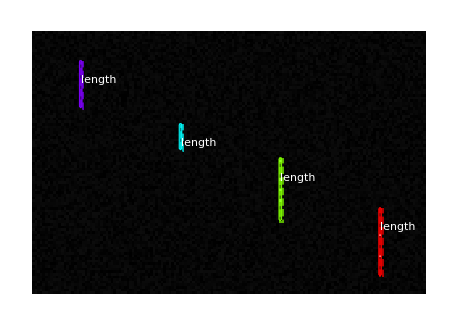

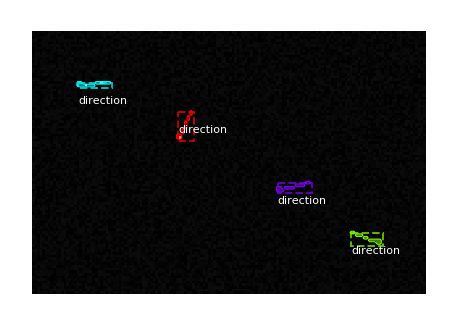

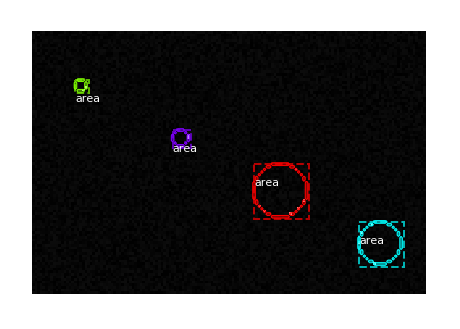

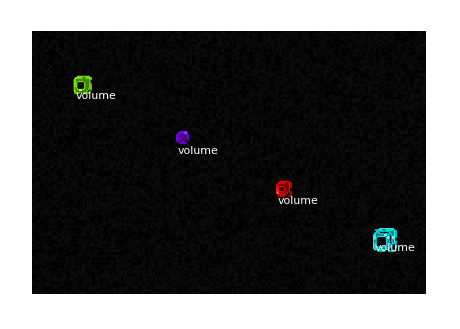

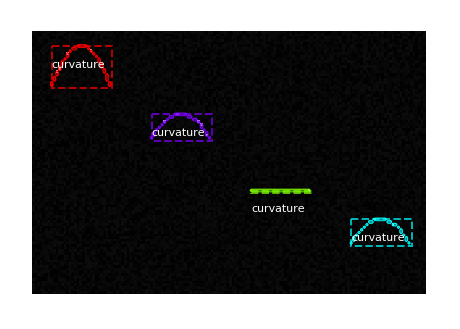

In [7]:
for data_class in DatasetGenerator.data_class_list:
    dataset_object = DatasetFromFile(file='output/' + data_class + '/train_0.npz').load_from_file()
    dataset_object.show_bbox(6)